## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
# study_results_df                             

# Combine the data into a single dataset
# merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="any")
# merge_df.head()

# Display the data table for preview


In [2]:
merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="inner")
merge_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice=merge_df["Mouse ID"].value_counts()
len(mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = merge_df[merge_df.duplicated()]
duplicateRowsDF
# duplicateRowsDF = dfObj[dfObj.duplicated()]
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(duplicateRowsDF)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Dup_mice=merge_df[merge_df('Mouse ID')==g989]


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep="first")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mice=df["Mouse ID"].value_counts()
len(mice)

249

## Summary Statistics

In [19]:
droppedf = df.drop(columns=['Sex','Mouse ID','Age_months','Weight (g)','Timepoint','Metastatic Sites'])
droppedf.head()



,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# xdf=merge_df.groupby["Tumor Volume (mm3)"].mean()("Drug Regimen")
# xdf
# ,'median','var','std','sem']})


# This method is the most straighforward, creating multiple series and putting them all together at the end.



TypeError: 'instancemethod' object has no attribute '__getitem__'

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df=merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:

Mouse_1=merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


<function matplotlib.pyplot.show>

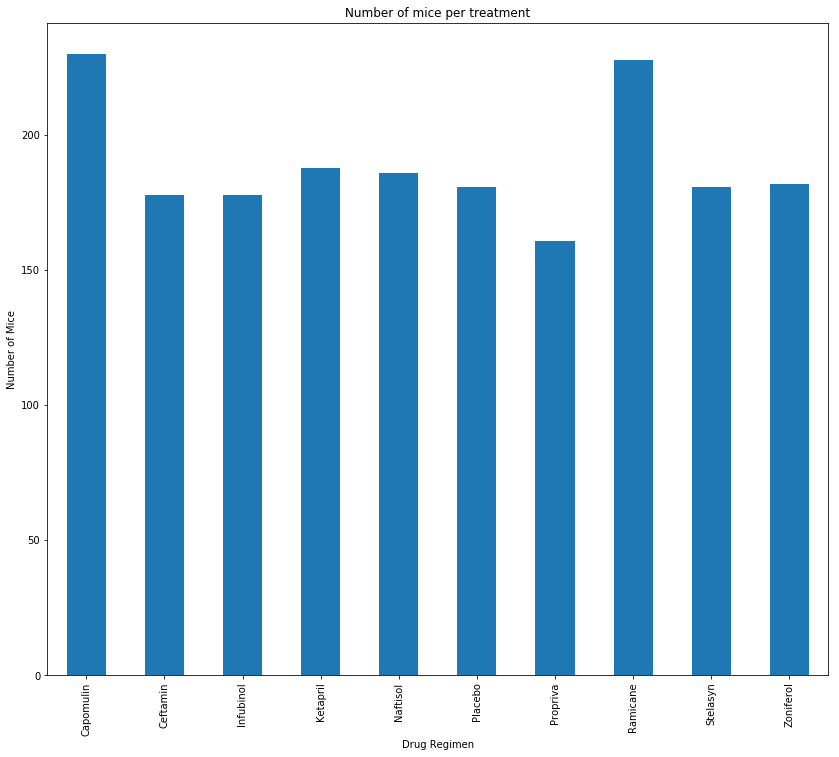

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# users = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
# x_axis = np.arange(len(mice)
                   
plot_pandas=Mouse_1.plot.bar(figsize =(14,12))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of mice per treatment")
plt.show

<function matplotlib.pyplot.show>

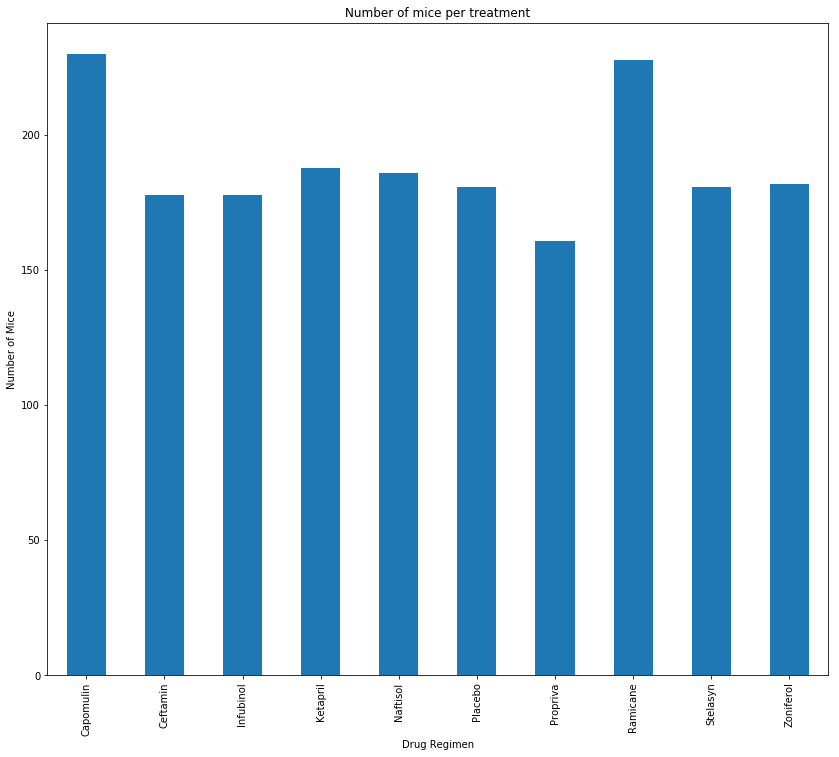

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plot_matplot=Mouse_1.plot(kind="bar",figsize =(14,12))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of mice per treatment")
plt.show


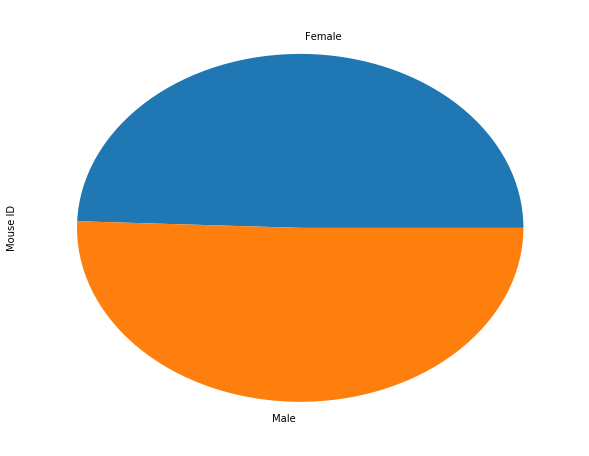

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mouse_2=merge_df.groupby(["Sex"]).count()["Mouse ID"]
plot_pandas=Mouse_2.plot.pie(figsize =(10,8))

plt.show()


<function matplotlib.pyplot.show>

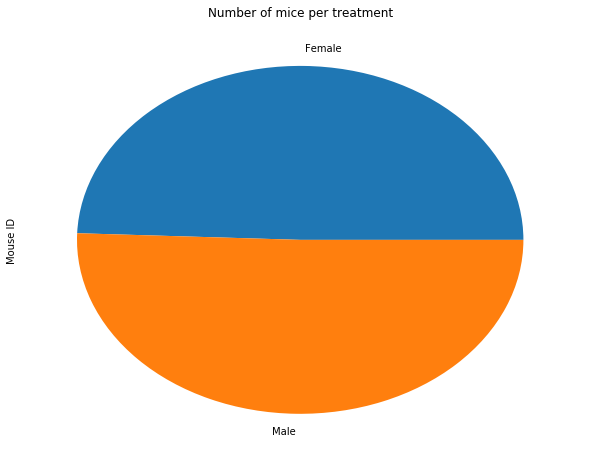

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plot_matplot=Mouse_2.plot(kind="pie",figsize =(10,8))
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Mice")
plt.title("Number of mice per treatment")
plt.show

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Drug Regimens = ["Capomulin, Ramicane, Infubinol, and Ceftamin]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df=merge_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df=pd.merge(last_timepoint_df,merge_df, on="Mouse ID", how = "inner")
final_df.head()
        

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1


In [70]:
merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',['Tumor Volume (mm3)']]
merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane',['Tumor Volume (mm3)']]
merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol',['Tumor Volume (mm3)']]
merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin',['Tumor Volume (mm3)']]

# details=pd.DataFrame(columns = ('Tumor Volume (mm3)'),index=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# tumor vol data =[]


# Put treatments into a list for for loop (and later for plot labels)

# result=merge_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
# result
# Create empty list to fill with tumor vol data (for plotting)
# "?"

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of drug is: {lowerq}")
print(f"The upper quartile of drug is: {upperq}")
print(f"The interquartile range of drug is: {iqr}")
print(f"The the median of drug is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-70-20e97d717f8e>, line 23)

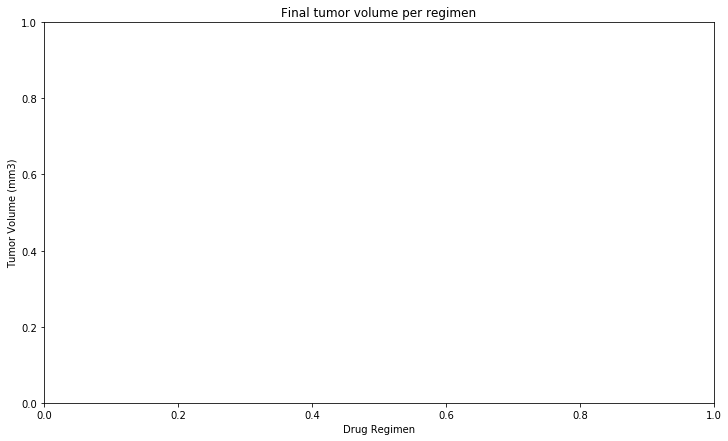

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Drug Regimens = ["Capomulin", "Ramicane", "Infubinol", and "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.set_title('Final tumor volume per regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations


## Line and Scatter Plots

In [78]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df=merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [101]:
# cap_1=line_df.groupby(["Mouse ID"].agg['Weight (g)','Tumor Volume (mm3)])
cap_1=line_df.groupby("Tumor Volume (mm3)").mean()



In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulinregimen

plt.scatter(line_df["Weight (g))"],["cap_1"])
clb = plt.colorbar()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.show()

KeyError: 'Weight (g))'

## Correlation and Regression

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = line_df['Weight (g)']
y_values = line_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs. Avg. Tumor Volume")
# print(f"The r-squared is: {rvalue}")
plt.show()

NameError: name 'linregress' is not defined